In [16]:
from collections import Counter
import pandas as pd
import os
from pre_process.load_sleep_data import LoadSleepData

load_sleep_data = LoadSleepData(
    data_type="spectrogram",
    verbose=0,
    fit_pos="middle",
    kernel_size=256,
    is_previous=True,
    stride=16,
    is_normal=True,
)
data = load_sleep_data.load_data(
    load_all=True,
)

*** すべての被験者を読み込みます（load_dataの引数:nameは無視します） ***
 H_Li を読み込みます 
 H_Murakami を読み込みます 
 H_Yamamoto を読み込みます 
 H_Kumazawa を読み込みます 
 H_Hayashi を読み込みます 
 H_Kumazawa_F を読み込みます 
 H_Takadama を読み込みます 
 H_Hiromoto を読み込みます 
 H_Kashiwazaki を読み込みます 


[]

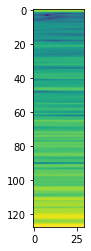

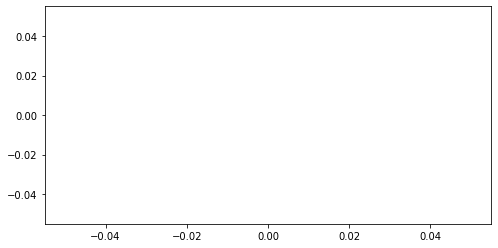

In [18]:
import matplotlib.pyplot as plt
# x = data[0][1].spectrogram
plt.imshow(data[0][6].spectrogram)
plt.savefig("spectrogram.png")
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot()
# plt.savefig("cepctrum.png")

In [6]:
x = data[0][0].cepstrum

In [7]:
x.shape

(256,)

(256,)


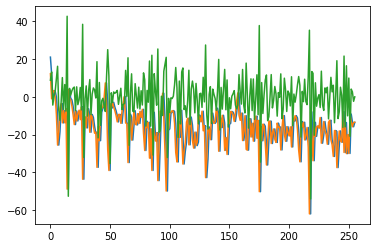

In [8]:
import numpy as np
_x = np.append(x[1:], x[-1])
print(_x.shape)
x_dif = x - _x
plt.plot(x)
plt.plot(_x)
plt.plot(x_dif)

In [6]:
# グラフ描画のライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

def plot_images(images_arr, does_save: bool, filepath: str, time: list, ss: list, file_id: str):
    fig, axes = plt.subplots(1, 10, figsize=(8, 4))
    axes = axes.flatten()
    for img, ax, _time, _ss in zip(images_arr, axes, time, ss):
        ax.imshow(img)
#         ax.plot(img)
        ax.axis("off")
        ax.set_title(_time)
    plt.tight_layout()
    if does_save:
        abs_path = os.path.join(filepath, file_id+".png")
        plt.savefig(abs_path)
    plt.show()

def map_reshapred_spectrum(obj):
    return obj.spectrum.reshape(2**5, 2**3)

def map_reshapred_cepstrum(obj):
    return obj.cepstrum.reshape(2**5, 2**3)

def map_cepstrum(obj):
    return obj.spectrum.reshape(256, -1)
    
def map_spectrogram(obj):
    return obj.spectrogram

def map_ss(obj):
    return obj.ss

def map_time(obj):
    return obj.time

def map_time_ss(obj):
    return obj.time, obj.ss

In [ ]:
# ファイルパスをtmpの下に置く
filepath = os.path.join(os.environ["sleep"], "tmp", "spectrogram")
for start in range(0, 3000, 10):
    time = list()
    ss = list()
    stop = start + 10
    # 睡眠段階と時間をファイル名のために保存
    for _time, _ss in map(map_time_ss, data[0][start:stop]):
        time.append(_ss)
        ss.append(_ss)
    plot_images(map(map_reshapred_cepstrum, data[0][start:stop]), does_save = False,
               filepath = filepath, time = time, ss = ss, file_id=str(start))


In [56]:
ss = map(map_ss, data[0])
Counter(ss)

Counter({2: 1661, 1: 656, 5: 415, 4: 704, 3: 156, None: 1958})

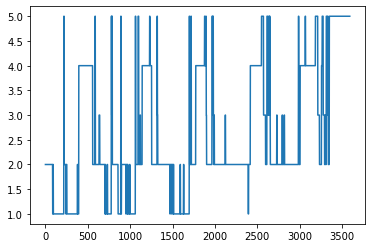

In [58]:
ss = map(map_ss, data[0])
plt.plot(list(ss))

In [89]:
4*30/16

7.5